In [101]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


[[0.00000e+00 1.98250e+04]
 [2.00000e+01 2.84860e+04]
 [4.00000e+01 2.86410e+04]
 ...
 [1.14827e+05 2.43300e+04]
 [1.14847e+05 2.43380e+04]
 [1.14867e+05 2.39000e+04]]


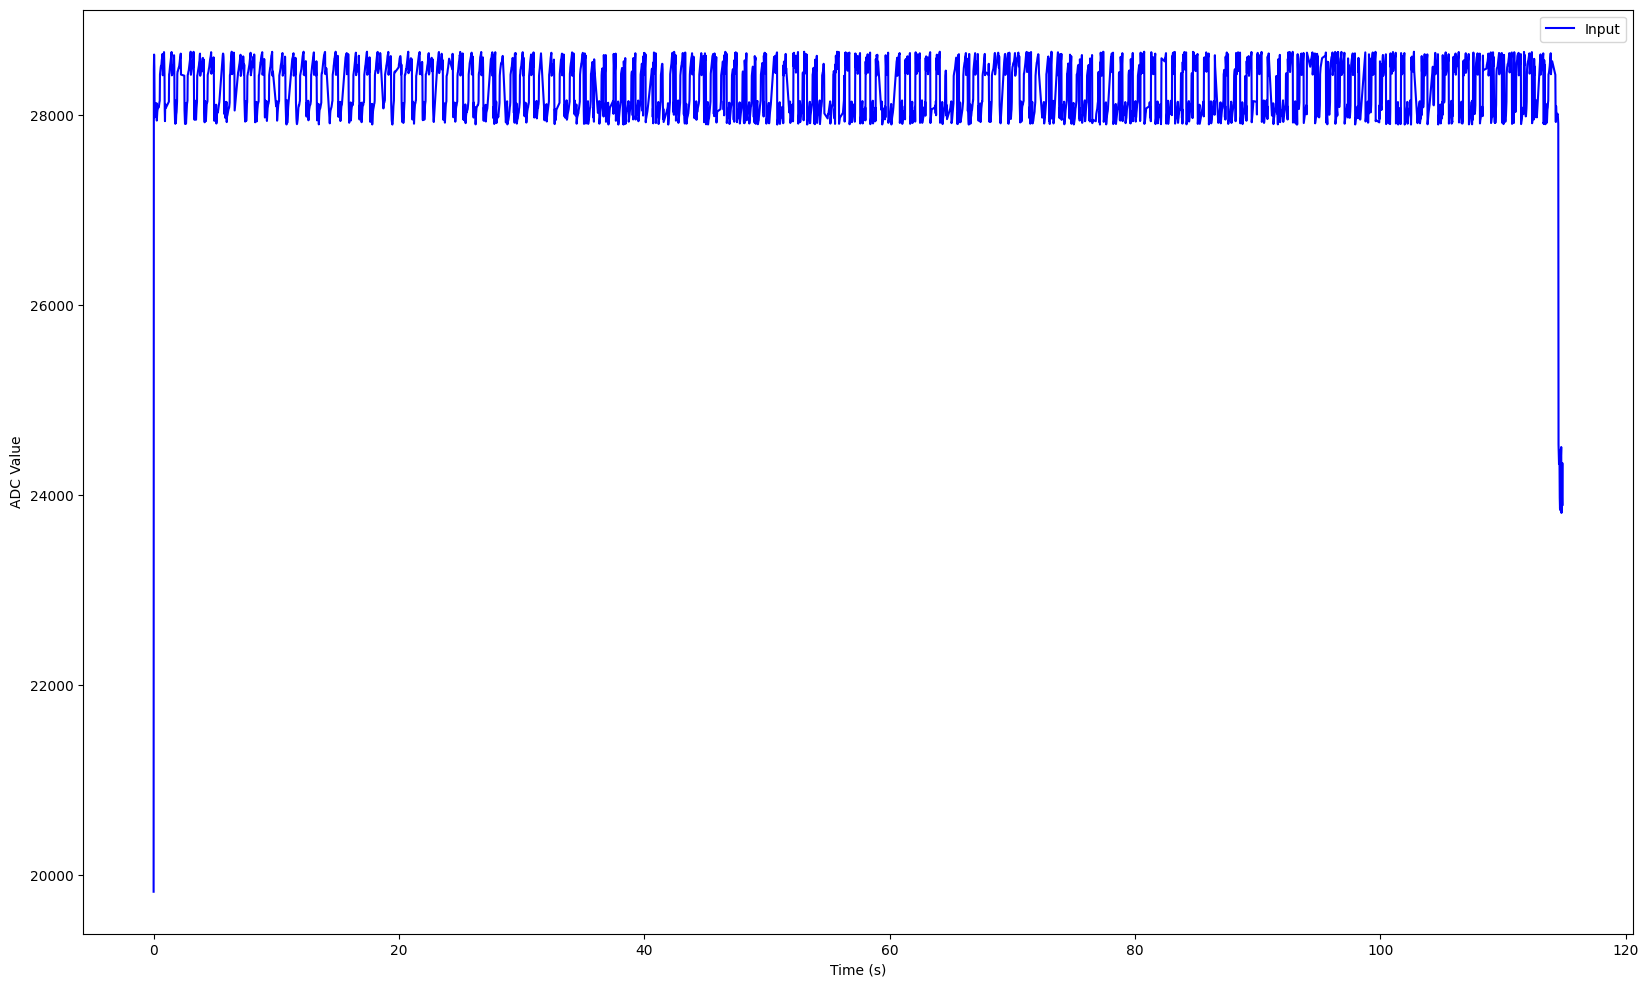

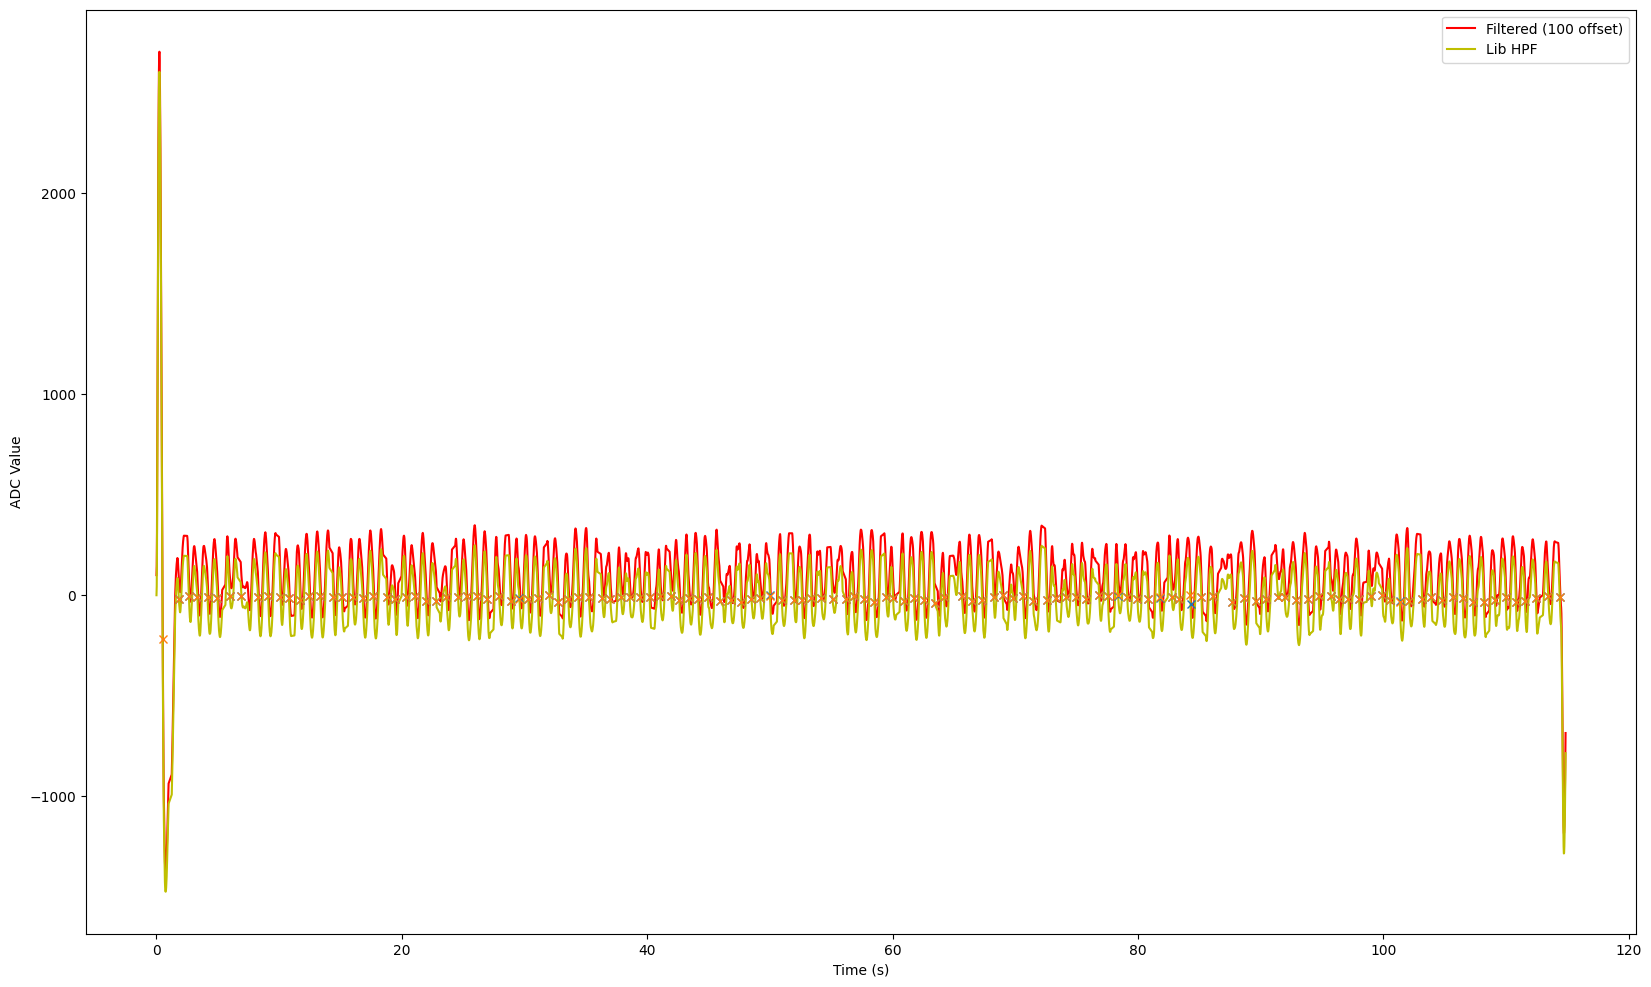

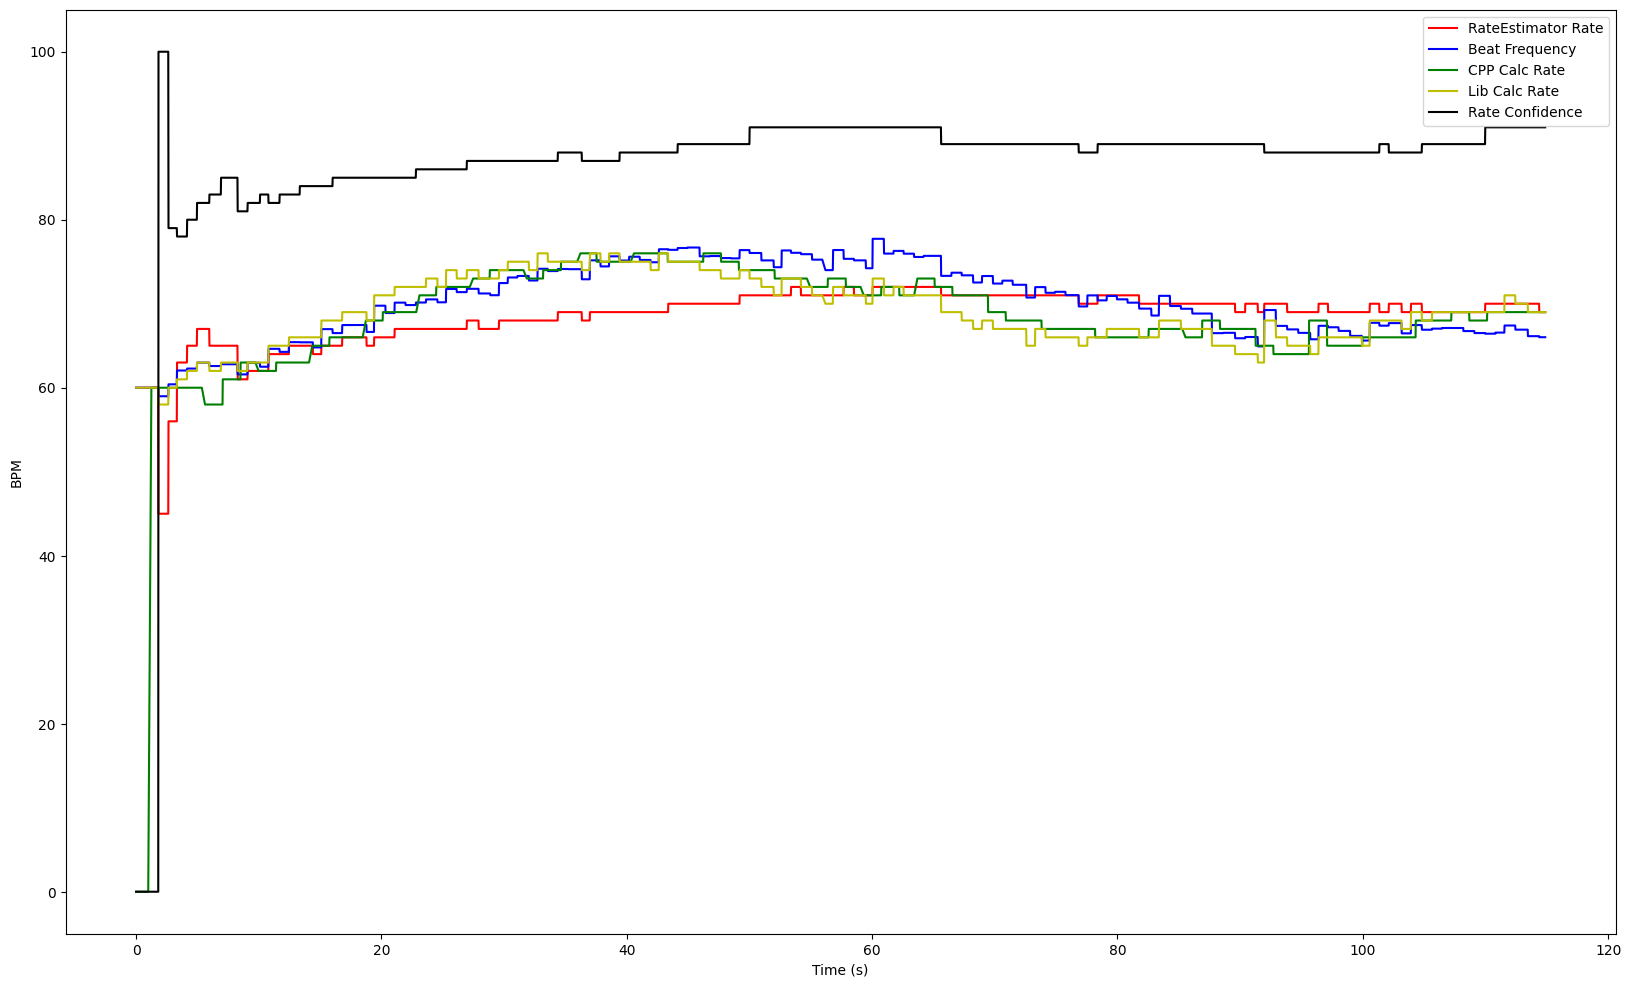

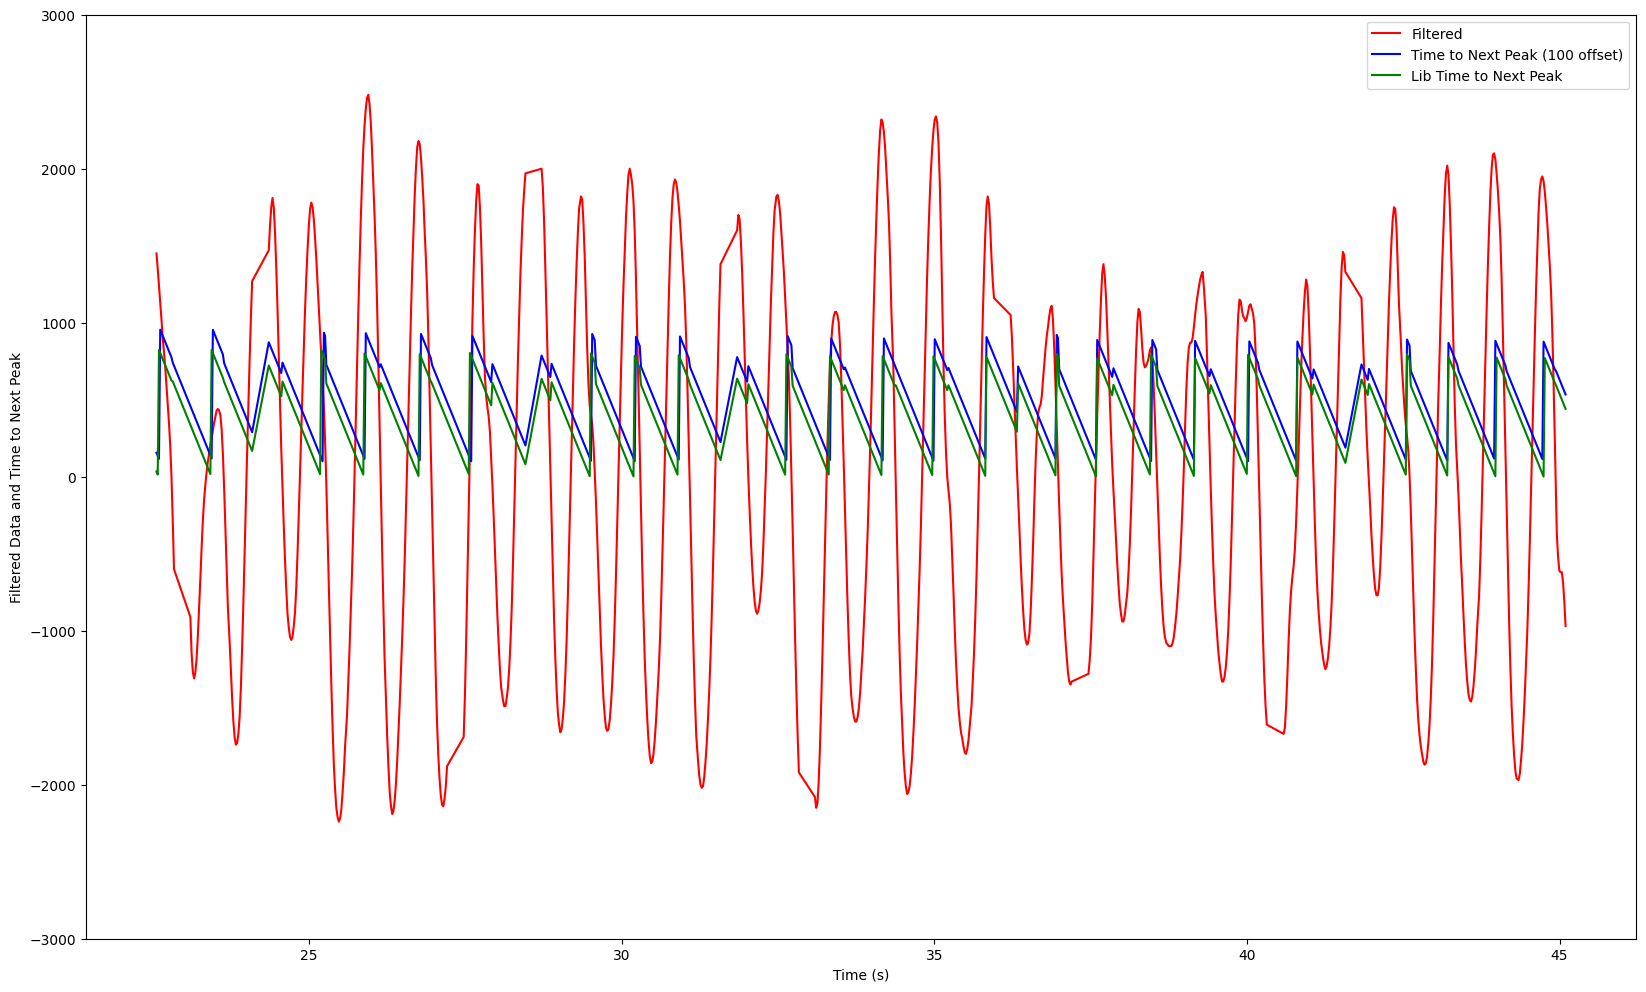

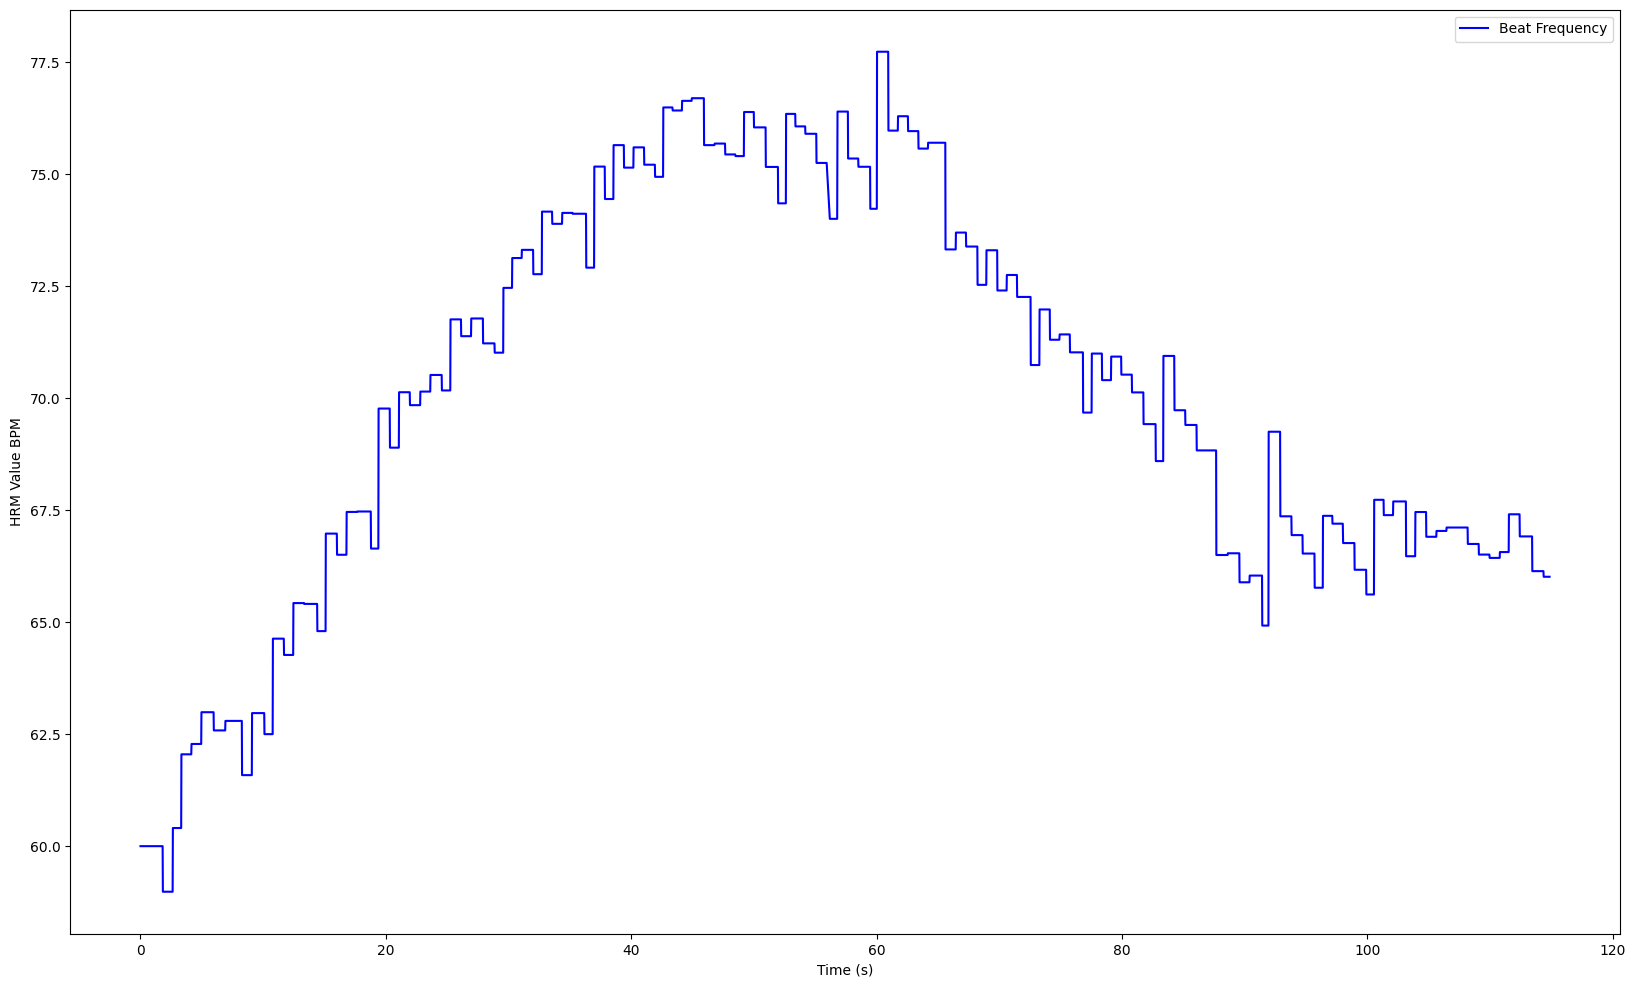

In [102]:
# Open data file in evaluations/HRMAnalysisCPP/filtered_data.txt

input_data = np.loadtxt('../HRMAnalysisCPP/input_data.txt', delimiter=' ')
filtered_data = np.loadtxt('../HRMAnalysisCPP/filtered_data.txt', delimiter=' ')

# Set plot size
mpl.rcParams['figure.figsize'] = (20,12)

timestamps = filtered_data[:,0] / 1000
sensor_filtered_data = filtered_data[:,1]
zero_crossing_times_ms = filtered_data[:,2]
zero_crossings = np.where(zero_crossing_times_ms > 0)[0]
rate_estimator_rate_bpm = filtered_data[:,3]
rate_confidence = filtered_data[:,4]
time_to_next_peak_ms = filtered_data[:,5]
beat_freq_hz = filtered_data[:,6]
cpp_calc_rate_bpm = filtered_data[:,7]
lib_calc_rate_hz = filtered_data[:,8]
lib_calc_rate_bpm = filtered_data[:,9]
lib_time_to_next_peak_ms = filtered_data[:,10]
lib_pulse_interval_ms = filtered_data[:,11]
lib_lpf_output = filtered_data[:,12]
lib_hpf_output = filtered_data[:,13]
lib_zero_crossing_output = filtered_data[:,14]
lib_zero_crossings = np.where(lib_zero_crossing_output > 0)[0]

print(input_data)

# Plot input data
plt.plot(input_data[:,0]/1000, input_data[:,1], 'b', label='Input')
plt.xlabel('Time (s)')
plt.ylabel('ADC Value')
plt.legend()
plt.show()

# Plot filtered data
plt.plot(timestamps, sensor_filtered_data + 100, 'r', label='Filtered (100 offset)')
# plt.plot(timestamps, lib_lpf_output, 'g', label='Lib LPF')
plt.plot(timestamps, lib_hpf_output, 'y', label='Lib HPF')
plt.plot(timestamps[zero_crossings], sensor_filtered_data[zero_crossings], "x")
plt.plot(timestamps[lib_zero_crossings], lib_hpf_output[lib_zero_crossings], "x")
plt.xlabel('Time (s)')
plt.ylabel('ADC Value')
plt.legend()
plt.show()

# Plot rate and confidence on same axes
plt.plot(timestamps, rate_estimator_rate_bpm, 'r', label='RateEstimator Rate')
plt.plot(timestamps, beat_freq_hz * 60, 'b', label='Beat Frequency')
plt.plot(timestamps, cpp_calc_rate_bpm, 'g', label='CPP Calc Rate')
plt.plot(timestamps, lib_calc_rate_bpm, 'y', label='Lib Calc Rate')
plt.plot(timestamps, rate_confidence, 'k', label='Rate Confidence')
plt.xlabel('Time (s)')
plt.ylabel('BPM')
plt.legend()
plt.show()

# Plot points of filtered data and time to next peak on same axes
st = 1000
ln = 1000
plt.plot(timestamps[st:st+ln], sensor_filtered_data[st:st+ln] * 10, 'r', label='Filtered')
plt.plot(timestamps[st:st+ln], time_to_next_peak_ms[st:st+ln] + 100, 'b', label='Time to Next Peak (100 offset)')
plt.plot(timestamps[st:st+ln], lib_time_to_next_peak_ms[st:st+ln], 'g', label='Lib Time to Next Peak')
# Limit Y axis to +/-3000
plt.ylim(-3000,3000)
plt.xlabel('Time (s)')
plt.ylabel('Filtered Data and Time to Next Peak')
plt.legend()
plt.show()

# Plot points of beat frequency 
plt.plot(timestamps, beat_freq_hz * 60, 'b', label='Beat Frequency')
plt.xlabel('Time (s)')
plt.ylabel('HRM Value BPM')
plt.legend()
plt.show()

